<a href="https://colab.research.google.com/github/Aya-Ai-2022/Generative-Models/blob/main/Geometry_Aya_(final1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Geom(1).csv')

print(df.head())


         .1  Unnamed: 2  ...  Unnamed: 119  Unnamed: 120  Unnamed: 121
0   82    0    81.55081  ...     -8.571701            82     -0.000381
1   82    0    81.55078  ...     -8.571686            82     -0.000366
2  129    0   128.29330  ...    -13.484740           129     -0.000595
3  108    0   107.40840  ...    -11.289550           108     -0.000504
4  145    0   144.20570  ...    -15.157260           145     -0.000671

[5 rows x 122 columns]


In [ ]:
print(df.info)


<bound method DataFrame.info of           .1  Unnamed: 2  ...  Unnamed: 119  Unnamed: 120  Unnamed: 121
0    82    0    81.55081  ...     -8.571701            82     -0.000381
1    82    0    81.55078  ...     -8.571686            82     -0.000366
2   129    0   128.29330  ...    -13.484740           129     -0.000595
3   108    0   107.40840  ...    -11.289550           108     -0.000504
4   145    0   144.20570  ...    -15.157260           145     -0.000671
5    89    0    88.51245  ...     -9.303406            89     -0.000427
6    83    0    82.54532  ...     -8.676208            83     -0.000366
7   133    0   132.27140  ...    -13.902860           133     -0.000610
8   116    0   115.36450  ...    -12.125820           116     -0.000534
9    79    0    78.56723  ...     -8.258099            79     -0.000366
10  131    0   130.28230  ...    -13.693790           131     -0.000610
11   89    0    88.51245  ...     -9.303436            89     -0.000397
12   85    0    84.53442  ...   

In [ ]:
df.shape

(22, 122)

In [ ]:
d2=df[df.columns[::2]]

In [ ]:
d1=df[df.columns[1::2]]

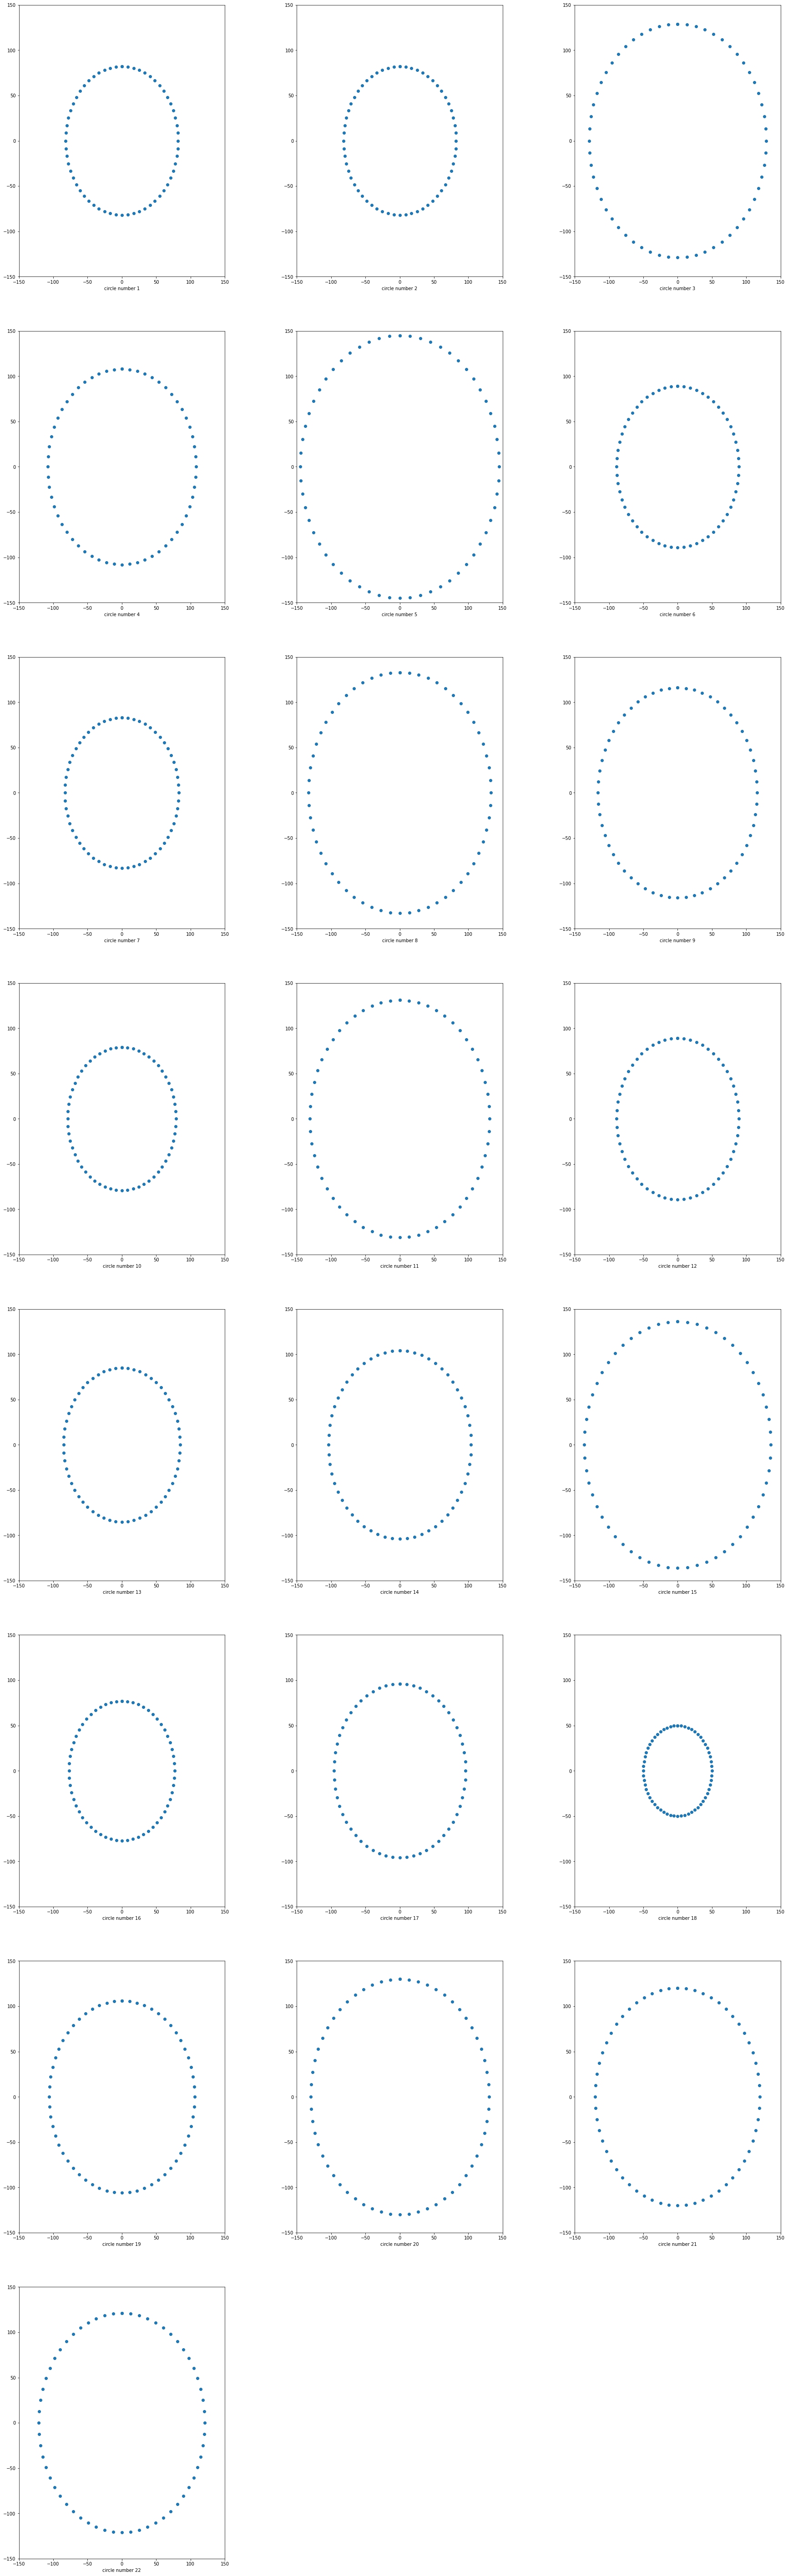

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 100))
for i in range(22):
 
    ax=plt.subplot(8,3,i+1)
    plt.plot(d1.iloc[i],d2.iloc[i],"o")
  
    plt.subplots_adjust(wspace=0.35)
    plt.xlabel("circle number "+str(i+1))
    plt.subplots_adjust(bottom=0.1)
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    
   
    
   
plt.show()  

In [ ]:
df.iloc[1][1]

0.0

In [ ]:
df[:10]

,,.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,82,0,81.55081,8.571335,80.20810,17.04875,77.98663,25.33940,74.91074,33.35240,71.01407,41.0,66.33939,48.19839,60.93787,54.86871,54.86871,60.93787,48.19839,66.33939,41.0,71.01410,33.35242,74.91074,25.33939,77.98663,17.04877,80.20810,8.571320,81.55081,0.0,82,-8.571350,81.55081,-17.04877,80.20810,-25.33939,77.98663,-33.35242,74.91074,...,-33.35257,-74.91064,-25.33960,-77.98657,-17.04898,-80.20805,-8.571564,-81.55077,-0.000244,-82,8.571106,-81.55083,17.04852,-80.20816,25.33914,-77.98671,33.35214,-74.91084,40.99976,-71.01422,48.19815,-66.33957,54.86850,-60.93808,60.93768,-54.86894,66.33920,-48.19865,71.01392,-41.00029,74.91058,-33.35272,77.98654,-25.33972,80.20804,-17.04910,81.55075,-8.571701,82,-0.000381
1,82,0,81.55078,8.571320,80.20813,17.04877,77.98663,25.33939,74.91071,33.35242,71.01410,41.0,66.33942,48.19839,60.93787,54.86871,54.86871,60.93787,48.19836,66.33939,41.0,71.01410,33.35242,74.91074,25.33942,77.98663,17.04877,80.20810,8.571350,81.55081,0.0,82,-8.571350,81.55081,-17.04877,80.20810,-25.33942,77.98663,-33.35242,74.91074,...,-33.35260,-74.91064,-25.33960,-77.98657,-17.04895,-80.20807,-8.571533,-81.55078,-0.000244,-82,8.571106,-81.55081,17.04852,-80.20816,25.33917,-77.98672,33.35217,-74.91083,40.99976,-71.01422,48.19818,-66.33957,54.86847,-60.93808,60.93768,-54.86893,66.33923,-48.19864,71.01392,-41.00027,74.91058,-33.35272,77.98651,-25.33972,80.20801,-17.04910,81.55078,-8.571686,82,-0.000366
2,129,0,128.29330,13.484180,126.18100,26.82060,122.68630,39.86319,117.84740,52.46902,111.71730,64.5,104.36320,75.82431,95.86566,86.31784,86.31787,95.86569,75.82428,104.36320,64.5,111.71730,52.46899,117.84740,39.86316,122.68630,26.82062,126.18100,13.484190,128.29330,0.0,129,-13.484190,128.29330,-26.82062,126.18100,-39.86322,122.68630,-52.46906,117.84740,...,-52.46930,-117.84720,-39.86353,-122.68620,-26.82092,-126.18100,-13.484500,-128.29330,-0.000366,-129,13.483760,-128.29340,26.82019,-126.18110,39.86279,-122.68640,52.46863,-117.84750,64.49963,-111.71750,75.82391,-104.36350,86.31750,-95.86600,95.86536,-86.31821,104.36290,-75.82471,111.71700,-64.50044,117.84720,-52.46951,122.68610,-39.86371,126.18090,-26.82115,128.29330,-13.484740,129,-0.000595
3,108,0,107.40840,11.289080,105.64000,22.45447,102.71410,33.37384,98.66290,43.92755,93.53076,54.0,87.37384,63.48080,80.25964,72.26611,72.26611,80.25964,63.48083,87.37384,54.0,93.53075,43.92755,98.66292,33.37384,102.71410,22.45447,105.63990,11.289060,107.40840,0.0,108,-11.289060,107.40840,-22.45447,105.63990,-33.37384,102.71410,-43.92755,98.66290,...,-43.92780,-98.66280,-33.37408,-102.71400,-22.45471,-105.63990,-11.289370,-107.40830,-0.000305,-108,11.288760,-107.40840,22.45416,-105.64000,33.37354,-102.71420,43.92725,-98.66306,53.99969,-93.53093,63.48047,-87.37406,72.26581,-80.25990,80.25940,-72.26641,87.37360,-63.48115,93.53052,-54.00037,98.66272,-43.92796,102.71400,-33.37427,105.63980,-22.45493,107.40830,-11.289550,108,-0.000504
4,145,0,144.20570,15.156620,141.83140,30.14719,137.90320,44.80746,132.46410,58.97681,125.57370,72.5,117.30750,85.22885,107.7560

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32

# This is our input image
input_img = keras.Input(shape=(122,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=keras.layers.LeakyReLU(alpha=1))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(122, activation=keras.layers.LeakyReLU(alpha=1))(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:

# from sklearn.datasets import make_regression
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense


In [ ]:

import numpy as np
x_train= df[:16]
x_test = df[16:]
print (x_train.shape)
print (x_test.shape)

(16, 122)
(6, 122)


In [ ]:
# df = StandardScaler().fit_transform(df)

In [ ]:
import numpy as np

In [ ]:
# x_train = np.array(x_train)

In [ ]:
# x_test= np.array(x_test)

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 9632.3145 - val_loss: 8669.6934
Epoch 2/200
1/1 [==============================] - 0s 31ms/step - loss: 8613.4082 - val_loss: 7798.6812
Epoch 3/200
1/1 [==============================] - 0s 24ms/step - loss: 7748.0479 - val_loss: 7062.6660
Epoch 4/200
1/1 [==============================] - 0s 29ms/step - loss: 7016.8105 - val_loss: 6444.0190
Epoch 5/200
1/1 [==============================] - 0s 28ms/step - loss: 6402.1782 - val_loss: 5926.2671
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 5887.7871 - val_loss: 5491.7817
Epoch 7/200
1/1 [==============================] - 0s 28ms/step - loss: 5456.1211 - val_loss: 5122.9233
Epoch 8/200
1/1 [==============================] - 0s 24ms/step - loss: 5089.6567 - val_loss: 4803.6479
Epoch 9/200
1/1 [==============================] - 0s 24ms/step - loss: 4772.4541 - val_loss: 4520.5015
Epoch 10/200
1/1 [==============================] - 0s 27ms/step -

In [ ]:
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs

array([[ 9.60089035e+01, -2.45316140e-03,  9.54795990e+01,
         1.00330124e+01,  9.39099884e+01,  1.99628220e+01,
         9.13045578e+01,  2.96628513e+01,  8.77104416e+01,
         3.90552711e+01,  8.31462402e+01,  4.80024414e+01,
         7.76709213e+01,  5.64289284e+01,  7.13390579e+01,
         6.42408524e+01,  6.42357635e+01,  7.13412933e+01,
         5.64285736e+01,  7.76729736e+01,  4.80056915e+01,
         8.31588669e+01,  3.90480804e+01,  8.77024612e+01,
         2.96700535e+01,  9.13065338e+01,  1.99630833e+01,
         9.39082718e+01,  1.00323229e+01,  9.54767151e+01,
         2.22751312e-03,  9.60056458e+01, -1.00363445e+01,
         9.54746323e+01, -1.99653912e+01,  9.39055252e+01,
        -2.96692677e+01,  9.13053665e+01, -3.90516281e+01,
         8.77018204e+01, -4.79990959e+01,  8.31388474e+01,
        -5.64303741e+01,  7.76717834e+01, -6.42378159e+01,
         7.13483200e+01, -7.13479996e+01,  6.42276688e+01,
        -7.76676331e+01,  5.64229584e+01, -8.31404343e+0

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

for i in range(6):
    n=decoded_imgs[:, ::2]
    k=decoded_imgs[:, 1::2]
print(n)

[[ 9.60089035e+01  9.54795990e+01  9.39099884e+01  9.13045578e+01
   8.77104416e+01  8.31462402e+01  7.76709213e+01  7.13390579e+01
   6.42357635e+01  5.64285736e+01  4.80056915e+01  3.90480804e+01
   2.96700535e+01  1.99630833e+01  1.00323229e+01  2.22751312e-03
  -1.00363445e+01 -1.99653912e+01 -2.96692677e+01 -3.90516281e+01
  -4.79990959e+01 -5.64303741e+01 -6.42378159e+01 -7.13479996e+01
  -7.76676331e+01 -8.31404343e+01 -8.77013779e+01 -9.13046417e+01
  -9.39067841e+01 -9.54705505e+01 -9.60056229e+01 -9.54811630e+01
  -9.39037476e+01 -9.13067398e+01 -8.77068558e+01 -8.31429977e+01
  -7.76703568e+01 -7.13470840e+01 -6.42399292e+01 -5.64272804e+01
  -4.80037613e+01 -3.90536880e+01 -2.96711407e+01 -1.99629784e+01
  -1.00388327e+01 -1.68898702e-03  1.00342827e+01  1.99577599e+01
   2.96631317e+01  3.90426750e+01  4.80046387e+01  5.64262047e+01
   6.42366180e+01  7.13496933e+01  7.76678848e+01  8.31427536e+01
   8.77050247e+01  9.13067780e+01  9.39036942e+01  9.54849625e+01
   9.60017

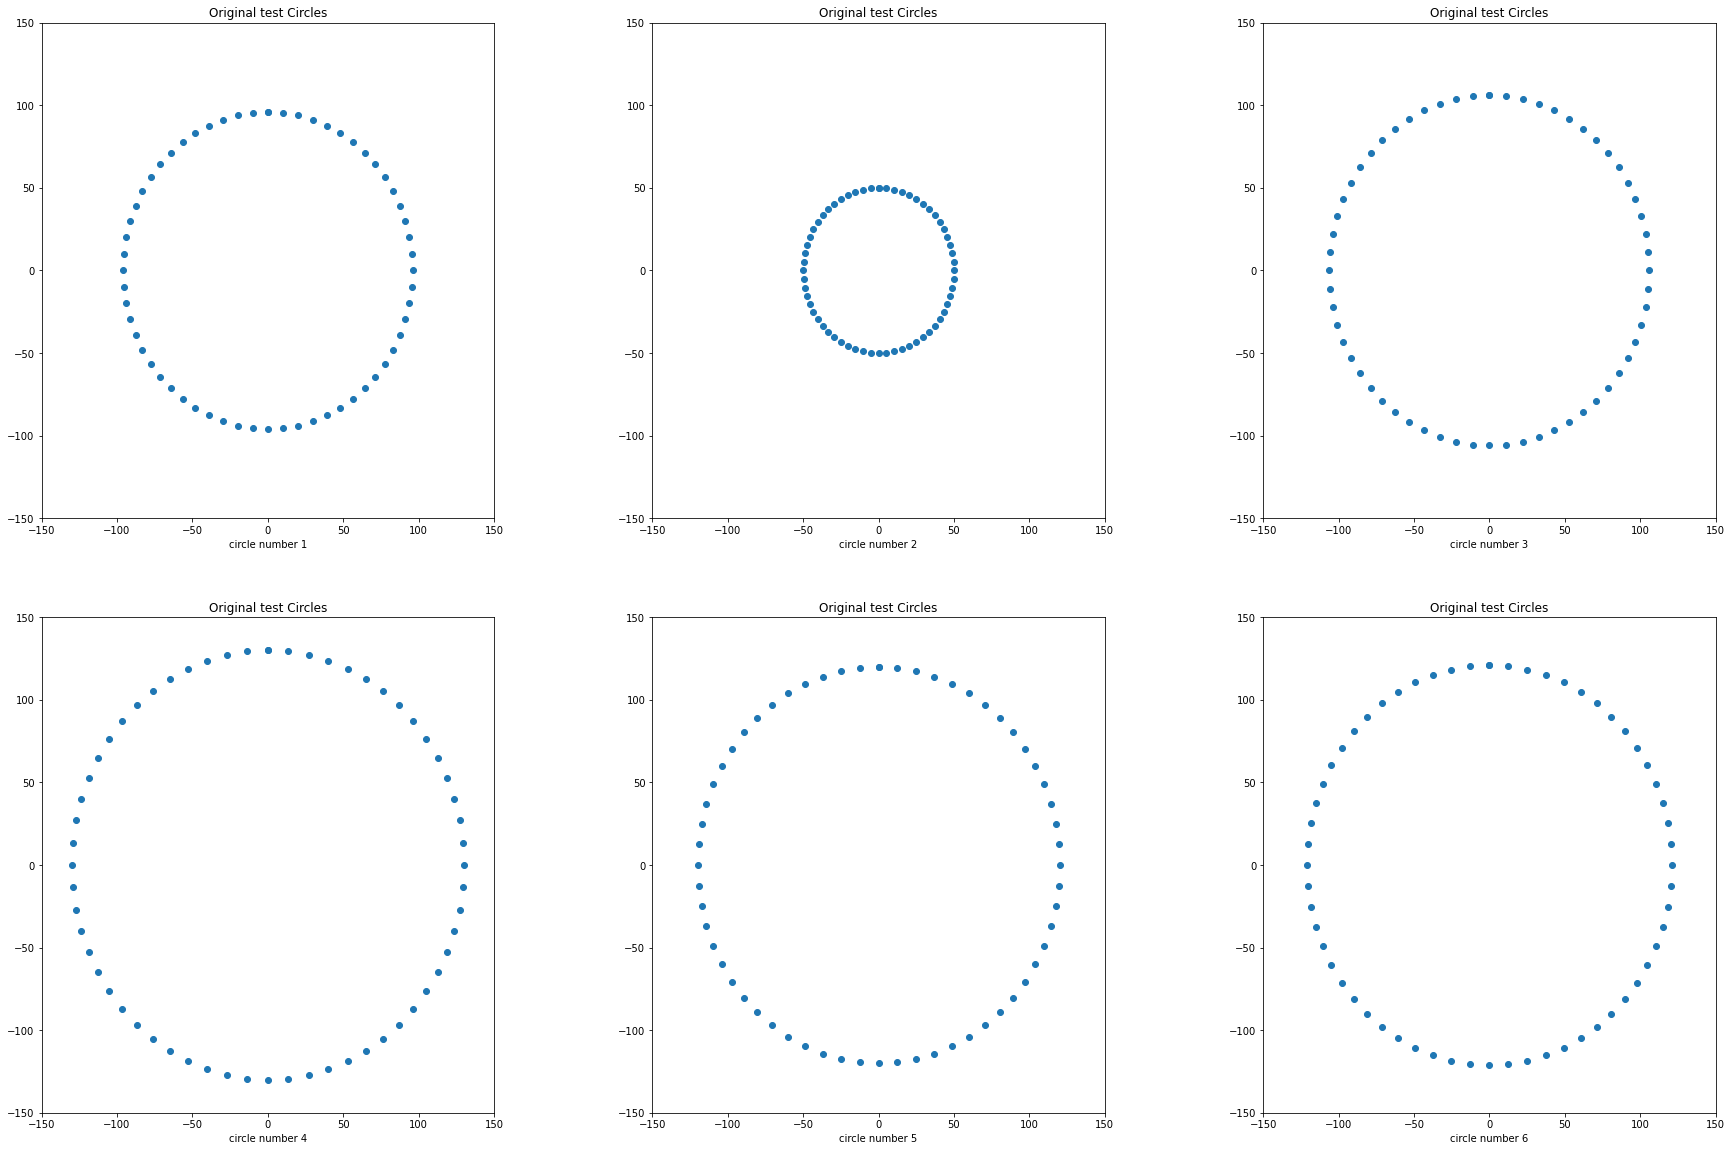

In [ ]:
      
     
    
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
for i in range(6):
 
    ax=plt.subplot(3,3,i+1)
    plt.plot(d1.iloc[i+16],d2.iloc[i+16],"o")
  
    plt.subplots_adjust(wspace=0.35)
    plt.xlabel("circle number "+str(i+1))
    plt.title('Original test Circles')
    plt.subplots_adjust(bottom=0.1)
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
   
   
   
plt.show()     
   
    
   


   
 

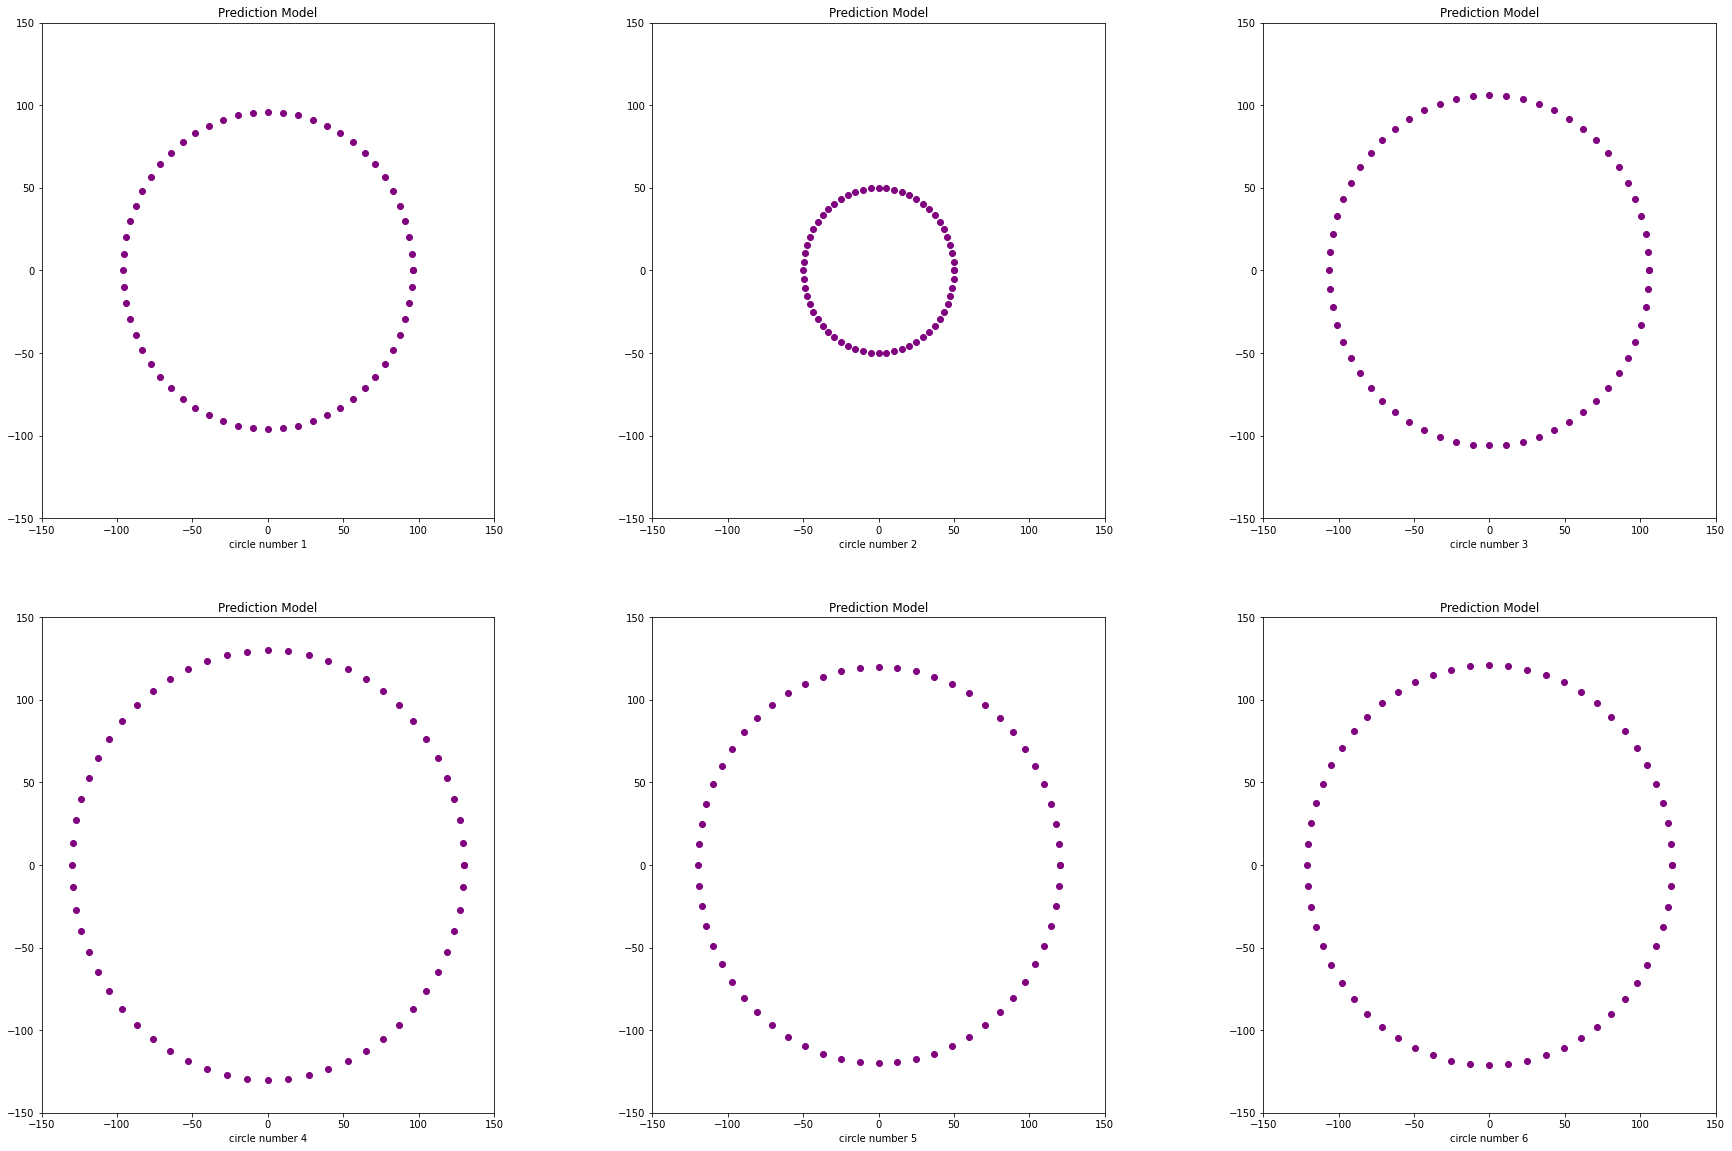

In [ ]:
plt.figure(figsize=(30, 30))
for i in range(6):
 
    ax=plt.subplot(3,3,i+1)
    plt.plot(n[i],k[i], "o",color='purple')
    plt.subplots_adjust(wspace=0.35)
    plt.xlabel("circle number "+str(i+1))
    plt.subplots_adjust(bottom=0.1)
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    plt.title('Prediction Model')
plt.show()

In [ ]:
#cnn_model.add(LeakyReLU(alpha=0.1))

In [ ]:
# v=[]

# for i in range(122):
#   if i %2 == 0:

#     b=lambda i:'X'+str(int((i+1)/2)+1)
#     v.append(b(i))
#   else:
#     b1=lambda i:'Y'+str(int((i+1)/2))
#     v.append(b1(i))

# print(v)